In [75]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

import os
from os.path import join, basename, dirname
from glob import glob
from IPython.display import display
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Data load

### 모델학습을 위해 데이터 전처리

In [15]:
path_to_current = os.getcwd()
path_to_dataset = join(path_to_current, 'data')
print(f'{path_to_current = }')

path_to_current = 'D:\\DACON_Anomoly'


In [16]:
df = pd.read_csv(join(path_to_dataset, 'new_train_df.csv'), index_col=['index'])

display(df)

,file_name,label,class
index,,,
0,10000.png,transistor-good,transistor
1,10001.png,capsule-good,capsule
2,10002.png,transistor-good,transistor
3,10003.png,wood-good,wood
4,10004.png,bottle-good,bottle
...,...,...,...
10752,20752.png,grid-broken,grid
10753,20753.png,grid-broken,grid
10754,20754.png,grid-broken,grid


In [17]:
# 절대 경로로 변환
df.file_name = df.file_name.apply(lambda path: join(path_to_dataset, 'train', path))

# class numbering
categories = {class_:i for i, class_ in enumerate(df['class'].unique())}
print(f"{categories = }")

# class: str -> int
df['class'] = df['class'].apply(lambda class_: categories[class_])

display(df)

categories = {'transistor': 0, 'capsule': 1, 'wood': 2, 'bottle': 3, 'screw': 4, 'cable': 5, 'carpet': 6, 'hazelnut': 7, 'pill': 8, 'metal_nut': 9, 'zipper': 10, 'leather': 11, 'toothbrush': 12, 'tile': 13, 'grid': 14}


,file_name,label,class
index,,,
0,D:\DACON_Anomoly\data\train\10000.png,transistor-good,0
1,D:\DACON_Anomoly\data\train\10001.png,capsule-good,1
2,D:\DACON_Anomoly\data\train\10002.png,transistor-good,0
3,D:\DACON_Anomoly\data\train\10003.png,wood-good,2
4,D:\DACON_Anomoly\data\train\10004.png,bottle-good,3
...,...,...,...
10752,D:\DACON_Anomoly\data\train\20752.png,grid-broken,14
10753,D:\DACON_Anomoly\data\train\20753.png,grid-broken,14
10754,D:\DACON_Anomoly\data\train\20754.png,grid-broken,14


### Tramsistor만 선택

In [19]:
mask = df['class'] == 0
mask

index
0         True
1        False
2         True
3        False
4        False
         ...  
10752    False
10753    False
10754    False
10755    False
10756    False
Name: class, Length: 10757, dtype: bool

In [27]:
df_transister = df[mask]
display(df_transister)

print('label 종류보기')

print(df_transister['label'].unique())

,file_name,label,class
index,,,
0,D:\DACON_Anomoly\data\train\10000.png,transistor-good,0
2,D:\DACON_Anomoly\data\train\10002.png,transistor-good,0
9,D:\DACON_Anomoly\data\train\10009.png,transistor-good,0
42,D:\DACON_Anomoly\data\train\10042.png,transistor-good,0
49,D:\DACON_Anomoly\data\train\10049.png,transistor-good,0
...,...,...,...
10722,D:\DACON_Anomoly\data\train\20722.png,transistor-bent_lead,0
10723,D:\DACON_Anomoly\data\train\20723.png,transistor-bent_lead,0
10724,D:\DACON_Anomoly\data\train\20724.png,transistor-bent_lead,0


label 종류보기
['transistor-good' 'transistor-bent_lead' 'transistor-damaged_case'
 'transistor-misplaced' 'transistor-cut_lead']


In [31]:
# label Numbering
transister_categories = {label:i for i, label in enumerate(df_transister['label'].unique())}
print(f"{transister_categories = }")


transister_categories = {'transistor-good': 0, 'transistor-bent_lead': 1, 'transistor-damaged_case': 2, 'transistor-misplaced': 3, 'transistor-cut_lead': 4}


In [33]:
df_transister['label'] = df_transister['label'].apply(lambda label:transister_categories[label])

display(df_transister)

C:\Users\kmski\AppData\Local\Temp\ipykernel_11376\2350636746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transister['label'] = df_transister['label'].apply(lambda label:transister_categories[label])


,file_name,label,class
index,,,
0,D:\DACON_Anomoly\data\train\10000.png,0,0
2,D:\DACON_Anomoly\data\train\10002.png,0,0
9,D:\DACON_Anomoly\data\train\10009.png,0,0
42,D:\DACON_Anomoly\data\train\10042.png,0,0
49,D:\DACON_Anomoly\data\train\10049.png,0,0
...,...,...,...
10722,D:\DACON_Anomoly\data\train\20722.png,1,0
10723,D:\DACON_Anomoly\data\train\20723.png,1,0
10724,D:\DACON_Anomoly\data\train\20724.png,1,0


In [52]:
# 각 라벨에 대한 개수 확인
df_transister['label'].value_counts()

0    213
1     55
2     55
3     55
4     55
Name: label, dtype: int64

### 함수 정의

In [98]:
x_train_all, y_train_all = df_transister['file_name'].values, df_transister['label'].values
x_train, x_test, y_train, y_test = train_test_split(x_train_all, y_train_all, stratify=y_train_all,
                                                  test_size=0.1, random_state=0)
print(f'{len(x_train) = }\n{len(x_test) = }')

len(x_train) = 389
len(x_test) = 44


In [76]:
def images2arrs(x, input_shape):
    arrs = []
    for image in x:
        arr = np.array(Image.open(image).resize(input_shape), dtype=np.uint8)
        # Grayscale -> RGB
        if len(arr.shape) == 2:
            arr = np.tile(arr[:, :, np.newaxis], reps=[1, 1, 3])
            
        arrs.append(arr)
        
    return np.array(arrs, dtype=np.float32)  # (batch_size,height,width,depth)

def normalize(x):
    return x / 255

### 데이터 만들기

In [99]:
x_train = images2arrs(x_train,input_shape=(224,224))
x_test = images2arrs(x_test,input_shape=(224,224))

In [100]:
# reshape
x_train_rows = x_train.reshape(x_train.shape[0],224*224*3)
x_test_rows = x_test.reshape(x_test.shape[0],224*224*3)

In [101]:
print(x_train_rows.shape)
print(x_test_rows.shape)

(389, 150528)
(44, 150528)


In [102]:
# Normalize
x_train_rows = normalize(x_train_rows)
x_test_rows = normalize(x_test_rows)

## Model 생성하기

In [103]:
classifier = KNeighborsClassifier(n_neighbors = 3)

In [104]:
classifier.fit(x_train_rows,y_train)

KNeighborsClassifier(n_neighbors=3)

In [105]:
# score
print(classifier.score(x_test_rows,y_test))

0.6363636363636364


### Score비교 (k=1~100)

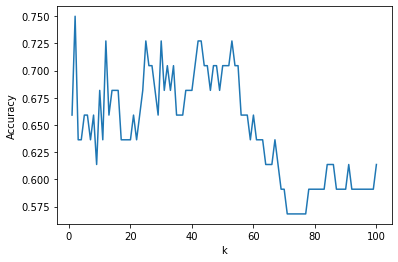

In [106]:
k_list = range(1,101)
accuracies=[]

for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train_rows,y_train)
    accuracies.append(classifier.score(x_test_rows,y_test))
    
plt.plot(k_list,accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()